In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 50

# Employment statistics data

In [2]:
oews = pd.read_csv('oews.csv')
oews.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_QUOTIENT,PCT_TOTAL,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,total,"139,099,570",0.1,NaN,NaN,NaN,27.07,"56,310",0.1,10.97,13.95,20.17,32.41,50.99,"22,810","29,020","41,950","67,410","106,050",NaN,NaN
1,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,major,"7,947,300",0.2,NaN,NaN,NaN,60.81,"126,480",0.2,24.84,35.70,52.77,76.71,#,"51,670","74,250","109,760","159,550",#,NaN,NaN
2,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1000,Top Executives,minor,"2,601,070",0.4,NaN,NaN,NaN,62.46,"129,920",0.2,21.41,32.57,51.05,80.73,#,"44,530","67,740","106,180","167,930",#,NaN,NaN
3,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1010,Chief Executives,broad,"202,360",1.0,NaN,NaN,NaN,95.12,"197,840",0.5,30.18,55.06,89.40,#,#,"62,780","114,530","185,950",#,#,NaN,NaN
4,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,detailed,"202,360",1.0,NaN,NaN,NaN,95.12,"197,840",0.5,30.18,55.06,89.40,#,#,"62,780","114,530","185,950",#,#,NaN,NaN


In [3]:
oews['AREA_TITLE'].unique()

array(['U.S.'], dtype=object)

In [4]:
oews = oews[['OWN_CODE','OCC_CODE','O_GROUP','OCC_TITLE','TOT_EMP','O_GROUP','TOT_EMP','A_MEAN','A_MEDIAN']]

In [5]:
oews['OCC_TITLE']=oews['OCC_TITLE'].str.lower()

In [6]:
ownership_codes = {1: 'Federal Government', 2: 'State Government', 3: 'Local Government', 123: 'Federal, State, and Local Government', 235:'Private, State, and Local Government', 35 : 'Private and Local Government', 5: 'Private', 57:'Private, Local Government Gambling Establishments (Sector 71), and Local Government Casino Hotels (Sector 72)', 58: 'Private plus State and Local Government Hospitals', 59: 'Private and Postal Service', 1235: 'Federal, State, and Local Government and Private Sector'}

In [7]:
oews['OWN_CODE'] = oews['OWN_CODE'].map(ownership_codes)

In [8]:
oews.head()

,OWN_CODE,OCC_CODE,O_GROUP,OCC_TITLE,TOT_EMP,O_GROUP,TOT_EMP,A_MEAN,A_MEDIAN
0,"Federal, State, and Local Government and Priva...",00-0000,total,all occupations,"139,099,570",total,"139,099,570","56,310","41,950"
1,"Federal, State, and Local Government and Priva...",11-0000,major,management occupations,"7,947,300",major,"7,947,300","126,480","109,760"
2,"Federal, State, and Local Government and Priva...",11-1000,minor,top executives,"2,601,070",minor,"2,601,070","129,920","106,180"
3,"Federal, State, and Local Government and Priva...",11-1010,broad,chief executives,"202,360",broad,"202,360","197,840","185,950"
4,"Federal, State, and Local Government and Priva...",11-1011,detailed,chief executives,"202,360",detailed,"202,360","197,840","185,950"


# Demographics data

In [9]:
age = pd.read_csv('age.csv')
age.head()

,Occupational Title,"Total, 16 years and over",16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age
0,Management occupations,"18,564",59,515,"3,285","4,520","4,733","3,799","1,653",46.9
1,Chief executives,"1,669",0,7,138,368,465,463,227,52.0
2,General and operations managers,"1,057",3,25,250,290,255,195,39,44.2
3,Legislators,25,0,2,6,1,3,5,8,–
4,Advertising and promotions managers,56,1,1,22,19,11,1,1,36.6


In [10]:
age['Occupational Title']=age['Occupational Title'].str.lower()

In [11]:
age.head()

,Occupational Title,"Total, 16 years and over",16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age
0,management occupations,"18,564",59,515,"3,285","4,520","4,733","3,799","1,653",46.9
1,chief executives,"1,669",0,7,138,368,465,463,227,52.0
2,general and operations managers,"1,057",3,25,250,290,255,195,39,44.2
3,legislators,25,0,2,6,1,3,5,8,–
4,advertising and promotions managers,56,1,1,22,19,11,1,1,36.6


In [12]:
demo = pd.read_csv('demo2.csv')
demo.head()

,Occupational Title,Employed,Women,White,Black or African American,Asian,Hispanic or Latino
0,"Management, professional, and related occupations","63,644",51.7,78.7,9.7,8.6,10.4
1,"Management, business, and financial operations...","27,143",44.6,81.7,8.8,6.7,10.9
2,Management occupations,"18,564",40.4,83.4,8.0,5.8,10.7
3,Chief executives,"1,669",29.3,88.0,4.3,5.4,7.4
4,General and operations managers,"1,057",30.5,84.4,7.1,4.5,12.4


In [13]:
demo['Occupational Title']=demo['Occupational Title'].str.lower()

# Education/ Training data

In [14]:
edu = pd.read_csv('education.csv')
edu.head()

,Occupational Title,2020 National Employment Matrix code,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
0,Chief executives,11-1011,Bachelor's degree,5 years or more,None
1,General and operations managers,11-1021,Bachelor's degree,5 years or more,None
2,Legislators,11-1031,Bachelor's degree,Less than 5 years,None
3,Advertising and promotions managers,11-2011,Bachelor's degree,Less than 5 years,None
4,Marketing managers,11-2021,Bachelor's degree,5 years or more,None


In [15]:
edu['Occupational Title']=edu['Occupational Title'].str.lower()

# Merging data

In [16]:
data = oews.merge(edu[['Occupational Title','Typical education needed for entry','Work experience in a related occupation','Typical on-the-job training needed to attain competency in the occupation']],left_on='OCC_TITLE',right_on='Occupational Title',how ='left')

In [17]:
data = data.merge(age,left_on='OCC_TITLE',right_on='Occupational Title', how='left')

In [18]:
data = data.merge(demo[['Occupational Title','Women','White','Black or African American','Asian','Hispanic or Latino']],left_on='OCC_TITLE',right_on='Occupational Title',how='left')

In [19]:
data.head()

,OWN_CODE,OCC_CODE,O_GROUP,OCC_TITLE,TOT_EMP,O_GROUP,TOT_EMP,A_MEAN,A_MEDIAN,Occupational Title_x,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,Occupational Title_y,"Total, 16 years and over",16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age,Occupational Title,Women,White,Black or African American,Asian,Hispanic or Latino
0,"Federal, State, and Local Government and Priva...",00-0000,total,all occupations,"139,099,570",total,"139,099,570","56,310","41,950",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Federal, State, and Local Government and Priva...",11-0000,major,management occupations,"7,947,300",major,"7,947,300","126,480","109,760",NaN,NaN,NaN,NaN,management occupations,"18,564",59,515,"3,285","4,520","4,733","3,799","1,653",46.9,management occupations,40.4,83.4,8.0,5.8,10.7
2,"Federal, State, and Local Government and Priva...",11-1000,minor,top executives,"2,601,070",minor,"2,601,070","129,920","106,180",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Federal, State, and Local Government and Priva...",11-1010,broad,chief executives,"202,360",broad,"202,360","197,840","185,950",chief executives,Bachelor's degree,5 years or more,None,chief executives,"1,669",0,7,138,368,465,463,227,52.0,chief executives,29.3,88.0,4.3,5.4,7.4
4,"Federal, State, and Local Government and Priva...",11-1011,detailed,chief executives,"202,360",detailed,"202,360","197,840","185,950",chief executives,Bachelor's degree,5 years or more,None,chief executives,"1,669",0,7,138,368,465,463,227,52.0,chief executives,29.3,88.0,4.3,5.4,7.4


In [20]:
data = data.loc[:,~data.columns.duplicated()]

In [21]:
del data['Occupational Title_x']

In [22]:
del data['Occupational Title_y']

In [23]:
del data['Occupational Title']

In [24]:
data.shape

(1329, 24)

In [25]:
data.isna().sum()*100/len(data)

OWN_CODE                                                                      0.000000
OCC_CODE                                                                      0.000000
O_GROUP                                                                       0.000000
OCC_TITLE                                                                     0.000000
TOT_EMP                                                                       0.000000
A_MEAN                                                                        0.000000
A_MEDIAN                                                                      0.000000
Typical education needed for entry                                           21.369451
Work experience in a related occupation                                      21.369451
Typical on-the-job training needed to attain competency in the occupation    21.369451
Total, 16 years and over                                                     44.620015
16 to 19 years                             

In [26]:
data.head()

,OWN_CODE,OCC_CODE,O_GROUP,OCC_TITLE,TOT_EMP,A_MEAN,A_MEDIAN,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,"Total, 16 years and over",16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age,Women,White,Black or African American,Asian,Hispanic or Latino
0,"Federal, State, and Local Government and Priva...",00-0000,total,all occupations,"139,099,570","56,310","41,950",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Federal, State, and Local Government and Priva...",11-0000,major,management occupations,"7,947,300","126,480","109,760",NaN,NaN,NaN,"18,564",59,515,"3,285","4,520","4,733","3,799","1,653",46.9,40.4,83.4,8.0,5.8,10.7
2,"Federal, State, and Local Government and Priva...",11-1000,minor,top executives,"2,601,070","129,920","106,180",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Federal, State, and Local Government and Priva...",11-1010,broad,chief executives,"202,360","197,840","185,950",Bachelor's degree,5 years or more,None,"1,669",0,7,138,368,465,463,227,52.0,29.3,88.0,4.3,5.4,7.4
4,"Federal, State, and Local Government and Priva...",11-1011,detailed,chief executives,"202,360","197,840","185,950",Bachelor's degree,5 years or more,None,"1,669",0,7,138,368,465,463,227,52.0,29.3,88.0,4.3,5.4,7.4


In [27]:
data['Typical on-the-job training needed to attain competency in the occupation'].unique()

array([nan, 'None', 'Moderate-term on-the-job training',
       'Long-term on-the-job training', 'Short-term on-the-job training',
       'Internship/residency', 'Apprenticeship'], dtype=object)

In [28]:
len(data['OCC_TITLE'].unique())

1064

In [29]:
data.to_csv('Job_title_dataset.csv')

In [30]:
data.dropna().head()

,OWN_CODE,OCC_CODE,O_GROUP,OCC_TITLE,TOT_EMP,A_MEAN,A_MEDIAN,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,"Total, 16 years and over",16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age,Women,White,Black or African American,Asian,Hispanic or Latino
3,"Federal, State, and Local Government and Priva...",11-1010,broad,chief executives,"202,360","197,840","185,950",Bachelor's degree,5 years or more,None,"1,669",0,7,138,368,465,463,227,52.0,29.3,88.0,4.3,5.4,7.4
4,"Federal, State, and Local Government and Priva...",11-1011,detailed,chief executives,"202,360","197,840","185,950",Bachelor's degree,5 years or more,None,"1,669",0,7,138,368,465,463,227,52.0,29.3,88.0,4.3,5.4,7.4
5,"Federal, State, and Local Government and Priva...",11-1020,broad,general and operations managers,"2,347,420","125,740","103,650",Bachelor's degree,5 years or more,None,"1,057",3,25,250,290,255,195,39,44.2,30.5,84.4,7.1,4.5,12.4
6,"Federal, State, and Local Government and Priva...",11-1021,detailed,general and operations managers,"2,347,420","125,740","103,650",Bachelor's degree,5 years or more,None,"1,057",3,25,250,290,255,195,39,44.2,30.5,84.4,7.1,4.5,12.4
7,"Federal, State, and Local Government and Priva...",11-1030,broad,legislators,"51,290","53,560","33,200",Bachelor's degree,Less than 5 years,None,25,0,2,6,1,3,5,8,–,–,–,–,–,–


In [31]:
data.describe(include='all')

,OWN_CODE,OCC_CODE,O_GROUP,OCC_TITLE,TOT_EMP,A_MEAN,A_MEDIAN,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,"Total, 16 years and over",16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age,Women,White,Black or African American,Asian,Hispanic or Latino
count,1329,1329,1329,1329,1329,1329,1329,1045,1045,1045,736,736,736,736,736,736,736,736,736,736,736,736,736,736
unique,1,1316,5,1064,1019,972,959,8,3,6,301,62,103,170,175,162,151,98,147,283,212,177,129,193
top,"Federal, State, and Local Government and Priva...",13-1020,detailed,tour and travel guides,"10,210",*,"27,080",High school diploma or equivalent,None,None,24,0,0,2,1,0,1,0,–,–,–,–,–,–
freq,1329,2,789,3,4,6,9,436,898,400,14,354,114,33,42,37,40,109,273,273,273,273,273,273


In [32]:
data['Typical education needed for entry'].unique()

array([nan, "Bachelor's degree", 'High school diploma or equivalent',
       "Master's degree", "Associate's degree",
       'Postsecondary nondegree award',
       'No formal educational credential', 'Some college, no degree',
       'Doctoral or professional degree'], dtype=object)

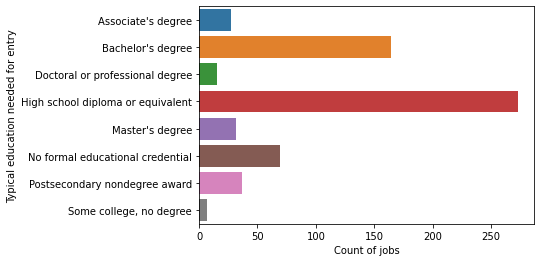

In [33]:
a=pd.DataFrame(data.groupby('Typical education needed for entry').count().Asian)
sns.barplot(y=a.index,x='Asian',data=a)
plt.xlabel('Count of jobs')
plt.show()

In [34]:
data['Typical on-the-job training needed to attain competency in the occupation'].value_counts()

None                                 400
Moderate-term on-the-job training    295
Short-term on-the-job training       227
Long-term on-the-job training         73
Internship/residency                  27
Apprenticeship                        23
Name: Typical on-the-job training needed to attain competency in the occupation, dtype: int64

In [35]:
len(data['OCC_TITLE'].unique())

1064

In [36]:
data.shape

(1329, 24)

In [37]:
data.isna().sum()*100/len(data)

OWN_CODE                                                                      0.000000
OCC_CODE                                                                      0.000000
O_GROUP                                                                       0.000000
OCC_TITLE                                                                     0.000000
TOT_EMP                                                                       0.000000
A_MEAN                                                                        0.000000
A_MEDIAN                                                                      0.000000
Typical education needed for entry                                           21.369451
Work experience in a related occupation                                      21.369451
Typical on-the-job training needed to attain competency in the occupation    21.369451
Total, 16 years and over                                                     44.620015
16 to 19 years                             

In [38]:
df=data.copy()

In [39]:
df.head()

,OWN_CODE,OCC_CODE,O_GROUP,OCC_TITLE,TOT_EMP,A_MEAN,A_MEDIAN,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,"Total, 16 years and over",16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age,Women,White,Black or African American,Asian,Hispanic or Latino
0,"Federal, State, and Local Government and Priva...",00-0000,total,all occupations,"139,099,570","56,310","41,950",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Federal, State, and Local Government and Priva...",11-0000,major,management occupations,"7,947,300","126,480","109,760",NaN,NaN,NaN,"18,564",59,515,"3,285","4,520","4,733","3,799","1,653",46.9,40.4,83.4,8.0,5.8,10.7
2,"Federal, State, and Local Government and Priva...",11-1000,minor,top executives,"2,601,070","129,920","106,180",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Federal, State, and Local Government and Priva...",11-1010,broad,chief executives,"202,360","197,840","185,950",Bachelor's degree,5 years or more,None,"1,669",0,7,138,368,465,463,227,52.0,29.3,88.0,4.3,5.4,7.4
4,"Federal, State, and Local Government and Priva...",11-1011,detailed,chief executives,"202,360","197,840","185,950",Bachelor's degree,5 years or more,None,"1,669",0,7,138,368,465,463,227,52.0,29.3,88.0,4.3,5.4,7.4


In [40]:
df.drop('OWN_CODE',inplace=True,axis=1)

In [41]:
#df.drop('OCC_CODE',inplace=True,axis=1)

In [42]:
#df.drop('OCC_TITLE',inplace=True,axis=1)

In [43]:
df.TOT_EMP.replace('**','0',inplace=True)
df.TOT_EMP.replace(',','', regex=True, inplace=True)

In [44]:
df.TOT_EMP.replace(',','', regex=True, inplace=True)

In [45]:
df.TOT_EMP=df.TOT_EMP.astype(int)

In [46]:
df.dtypes

OCC_CODE                                                                     object
O_GROUP                                                                      object
OCC_TITLE                                                                    object
TOT_EMP                                                                       int64
A_MEAN                                                                       object
A_MEDIAN                                                                     object
Typical education needed for entry                                           object
Work experience in a related occupation                                      object
Typical on-the-job training needed to attain competency in the occupation    object
Total, 16 years and over                                                     object
16 to 19 years                                                               object
20 to 24 years                                                              

In [47]:
df.describe(include='all')

,OCC_CODE,O_GROUP,OCC_TITLE,TOT_EMP,A_MEAN,A_MEDIAN,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,"Total, 16 years and over",16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age,Women,White,Black or African American,Asian,Hispanic or Latino
count,1329,1329,1329,1.329000e+03,1329,1329,1045,1045,1045,736,736,736,736,736,736,736,736,736,736,736,736,736,736
unique,1316,5,1064,NaN,972,959,8,3,6,301,62,103,170,175,162,151,98,147,283,212,177,129,193
top,13-1020,detailed,tour and travel guides,NaN,*,"27,080",High school diploma or equivalent,None,None,24,0,0,2,1,0,1,0,–,–,–,–,–,–
freq,2,789,3,NaN,6,9,436,898,400,14,354,114,33,42,37,40,109,273,273,273,273,273,273
mean,NaN,NaN,NaN,5.182981e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.991686e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.202000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,7.096000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2.624800e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df.A_MEAN.replace('**','0',inplace=True)
df.A_MEAN.replace(',','', regex=True, inplace=True)
df.A_MEAN.replace('*','0',inplace=True)
df.A_MEAN=df.A_MEAN.astype(int)

In [49]:
df.A_MEDIAN.replace('**','0',inplace=True)
df.A_MEDIAN.replace(',','', regex=True, inplace=True)
df.A_MEDIAN.replace('*','0',inplace=True)
df.A_MEDIAN.replace('#','0',inplace=True)
df.A_MEDIAN=df.A_MEDIAN.astype(int)

In [50]:
df.A_MEAN

0        56310
1       126480
2       129920
3       197840
4       197840
         ...  
1324     42620
1325     50670
1326     50670
1327     37770
1328     37770
Name: A_MEAN, Length: 1329, dtype: int64

In [51]:
df.A_MEDIAN

0        41950
1       109760
2       106180
3       185950
4       185950
         ...  
1324     39100
1325     45610
1326     45610
1327     32850
1328     32850
Name: A_MEDIAN, Length: 1329, dtype: int64

In [52]:
df['Work experience in a related occupation'].unique()

array([nan, '5 years or more', 'Less than 5 years', 'None'], dtype=object)

In [53]:
#df['Work experience in a related occupation']=df['Work experience in a related occupation'].astype('category').cat.codes

In [54]:
df['Typical on-the-job training needed to attain competency in the occupation'].unique()

array([nan, 'None', 'Moderate-term on-the-job training',
       'Long-term on-the-job training', 'Short-term on-the-job training',
       'Internship/residency', 'Apprenticeship'], dtype=object)

In [55]:
df['Total, 16 years and over'].unique()

array([nan, '18,564', '1,669', '1,057', '25', '56', '554', '521', '95',
       '744', '1,309', '272', '212', '300', '18', '287', '52', '901',
       '966', '948', '171', '1,092', '123', '711', '16', '24', '781',
       '424', '12', '10', '8,578', '36', '350', '305', '121', '832',
       '147', '997', '118', '99', '74', '115', '438', '1,696', '86', '60',
       '30', '514', '102', '400', '61', '96', '5,603', '594', '137', '42',
       '660', '107', '238', '417', '792', '32', '3', '156', '3,169',
       '190', '27', '45', '129', '7', '22', '70', '422', '89', '268',
       '33', '225', '53', '357', '17', '15', '560', '38', '82', '1,627',
       '84', '19', '112', '6', '80', '46', '336', '26', '5', '47', '50',
       '41', '68', '21', '4', '85', '2,717', '343', '40', '28', '62',
       '78', '673', '105', '230', '420', '57', '64', '1,882', '1,183',
       '416', '101', '83', '1,156', '535', '3,371', '963', '332', '687',
       '176', '34', '1,220', '3,042', '256', '11', '295', '131', '29',

In [56]:
def toint(df,x):
    df[x].replace('**','0',inplace=True)
    df[x].replace(',','', regex=True, inplace=True)
    df[x].replace('*','0',inplace=True)
    df[x].replace('#','0',inplace=True)
    df[x].replace('_','0',inplace=True)
    df[x].replace('–','0',inplace=True)
    return df[x].astype(float)
toint(df,'Total, 16 years and over')

0           NaN
1       18564.0
2           NaN
3        1669.0
4        1669.0
         ...   
1324       98.0
1325        NaN
1326        NaN
1327        NaN
1328        NaN
Name: Total, 16 years and over, Length: 1329, dtype: float64

In [57]:
for i in df.iloc[:,9:].columns:
    df[i]=toint(df,i)

In [58]:
df.dtypes

OCC_CODE                                                                      object
O_GROUP                                                                       object
OCC_TITLE                                                                     object
TOT_EMP                                                                        int64
A_MEAN                                                                         int64
A_MEDIAN                                                                       int64
Typical education needed for entry                                            object
Work experience in a related occupation                                       object
Typical on-the-job training needed to attain competency in the occupation     object
Total, 16 years and over                                                     float64
16 to 19 years                                                               float64
20 to 24 years                                                   

In [59]:
df.describe(include='all')

,OCC_CODE,O_GROUP,OCC_TITLE,TOT_EMP,A_MEAN,A_MEDIAN,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,"Total, 16 years and over",16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age,Women,White,Black or African American,Asian,Hispanic or Latino
count,1329,1329,1329,1.329000e+03,1329.000000,1329.000000,1045,1045,1045,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
unique,1316,5,1064,NaN,NaN,NaN,8,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,13-1020,detailed,tour and travel guides,NaN,NaN,NaN,High school diploma or equivalent,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,789,3,NaN,NaN,NaN,436,898,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,5.182981e+05,63233.431151,56712.919488,NaN,NaN,NaN,443.177989,15.815217,39.152174,99.875000,94.103261,89.114130,75.760870,29.237772,26.740489,28.989674,49.626359,7.212228,3.900951,10.468342
std,NaN,NaN,NaN,3.991686e+06,33503.514929,28260.586899,NaN,NaN,NaN,1403.516654,80.104412,135.491310,307.191178,301.564551,295.710146,255.118209,103.526338,21.011632,31.658147,38.827413,7.720177,5.931019,11.279489
min,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,2.202000e+04,39890.000000,36810.000000,NaN,NaN,NaN,28.000000,0.000000,1.000000,7.000000,6.000000,6.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,7.096000e+04,54040.000000,49520.000000,NaN,NaN,NaN,84.500000,1.000000,5.000000,20.500000,17.000000,17.000000,15.000000,5.000000,39.500000,15.650000,72.400000,5.900000,2.300000,8.900000
75%,NaN,NaN,NaN,2.624800e+05,76810.000000,69600.000000,NaN,NaN,NaN,282.500000,3.000000,22.250000,64.000000,63.500000,60.000000,45.250000,15.250000,43.925000,57.100000,82.500000,12.000000,5.600000,16.450000


In [60]:
df.head()

,OCC_CODE,O_GROUP,OCC_TITLE,TOT_EMP,A_MEAN,A_MEDIAN,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,"Total, 16 years and over",16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age,Women,White,Black or African American,Asian,Hispanic or Latino
0,00-0000,total,all occupations,139099570,56310,41950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11-0000,major,management occupations,7947300,126480,109760,NaN,NaN,NaN,18564.0,59.0,515.0,3285.0,4520.0,4733.0,3799.0,1653.0,46.9,40.4,83.4,8.0,5.8,10.7
2,11-1000,minor,top executives,2601070,129920,106180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11-1010,broad,chief executives,202360,197840,185950,Bachelor's degree,5 years or more,None,1669.0,0.0,7.0,138.0,368.0,465.0,463.0,227.0,52.0,29.3,88.0,4.3,5.4,7.4
4,11-1011,detailed,chief executives,202360,197840,185950,Bachelor's degree,5 years or more,None,1669.0,0.0,7.0,138.0,368.0,465.0,463.0,227.0,52.0,29.3,88.0,4.3,5.4,7.4


In [61]:
def fillna(df,x):
    df[x].fillna(df[x].mean(),inplace=True)

In [89]:
for i in df.iloc[:,9:].columns:
    fillna(df,i)
    

In [63]:
for i in df.iloc[:,10:17].columns:
    df[i]=df[i]*100/df['Total, 16 years and over']

In [64]:
df.drop('Total, 16 years and over',axis=1,inplace=True)

In [65]:
df.head()

,OCC_CODE,O_GROUP,OCC_TITLE,TOT_EMP,A_MEAN,A_MEDIAN,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age,Women,White,Black or African American,Asian,Hispanic or Latino
0,00-0000,total,all occupations,139099570,56310,41950,NaN,NaN,NaN,3.568593,8.834413,22.536092,21.233740,20.107978,17.094908,6.597298,26.740489,28.989674,49.626359,7.212228,3.900951,10.468342
1,11-0000,major,management occupations,7947300,126480,109760,NaN,NaN,NaN,0.317819,2.774187,17.695540,24.348201,25.495583,20.464340,8.904331,46.900000,40.400000,83.400000,8.000000,5.800000,10.700000
2,11-1000,minor,top executives,2601070,129920,106180,NaN,NaN,NaN,3.568593,8.834413,22.536092,21.233740,20.107978,17.094908,6.597298,26.740489,28.989674,49.626359,7.212228,3.900951,10.468342
3,11-1010,broad,chief executives,202360,197840,185950,Bachelor's degree,5 years or more,None,0.000000,0.419413,8.268424,22.049131,27.860995,27.741162,13.600959,52.000000,29.300000,88.000000,4.300000,5.400000,7.400000
4,11-1011,detailed,chief executives,202360,197840,185950,Bachelor's degree,5 years or more,None,0.000000,0.419413,8.268424,22.049131,27.860995,27.741162,13.600959,52.000000,29.300000,88.000000,4.300000,5.400000,7.400000


<AxesSubplot:>

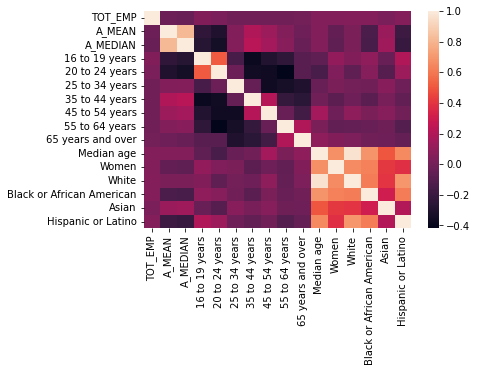

In [66]:
import seaborn as sns
sns.heatmap(df.corr())

In [67]:
Major_Categories = df[df['OCC_CODE'].str.contains('0000')]

In [68]:
Major_Categories.reset_index(inplace=True, drop=True)

In [69]:
Major_Categories

,OCC_CODE,O_GROUP,OCC_TITLE,TOT_EMP,A_MEAN,A_MEDIAN,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age,Women,White,Black or African American,Asian,Hispanic or Latino
0,00-0000,total,all occupations,139099570,56310,41950,NaN,NaN,NaN,3.568593,8.834413,22.536092,21.233740,20.107978,17.094908,6.597298,26.740489,28.989674,49.626359,7.212228,3.900951,10.468342
1,11-0000,major,management occupations,7947300,126480,109760,NaN,NaN,NaN,0.317819,2.774187,17.695540,24.348201,25.495583,20.464340,8.904331,46.900000,40.400000,83.400000,8.000000,5.800000,10.700000
2,13-0000,major,business and financial operations occupations,8387490,80680,72250,NaN,NaN,NaN,0.338074,4.966193,26.124971,22.685941,22.033108,17.370016,6.493355,43.400000,53.900000,78.000000,10.500000,8.700000,11.200000
3,15-0000,major,computer and mathematical occupations,4587700,96770,91350,NaN,NaN,NaN,0.410494,5.978940,30.198108,27.039086,19.543102,14.010352,2.802070,40.600000,25.200000,65.400000,9.100000,23.000000,8.400000
4,17-0000,major,architecture and engineering occupations,2515040,90300,83160,NaN,NaN,NaN,0.473335,6.563585,27.137898,21.520985,19.280530,19.312086,5.743137,42.900000,16.500000,78.000000,6.000000,13.600000,10.600000
5,19-0000,major,"life, physical, and social science occupations",1296060,79360,69760,NaN,NaN,NaN,0.430240,8.789183,29.010449,23.663184,18.315919,13.952059,5.838967,40.500000,49.300000,75.100000,6.500000,14.900000,8.500000
6,21-0000,major,community and social service occupations,2231070,52180,47520,NaN,NaN,NaN,0.552079,5.594406,24.217887,22.892897,20.426941,18.108208,8.207582,43.900000,68.800000,72.700000,19.900000,3.400000,13.500000
7,23-0000,major,legal occupations,1154740,112320,84910,NaN,NaN,NaN,0.106270,2.975558,20.138151,24.070138,22.316684,18.331562,12.114772,46.500000,51.900000,83.500000,8.600000,5.600000,8.300000
8,25-0000,major,educational instruction and library occupations,8446910,59810,52380,NaN,NaN,NaN,3.568593,8.834413,22.536092,21.233740,20.107978,17.094908,6.597298,26.740489,28.989674,49.626359,7.212228,3.900951,10.468342
9,27-0000,major,"arts, design, entertainment, sports, and media...",1857500,64400,53150,NaN,NaN,NaN,2.136752,7.297830,28.468113,22.024984,17.554241,14.628534,7.856673,41.200000,51.300000,82.000000,8.500000,5.900000,11.200000


In [70]:
df = df[~df['OCC_CODE'].str.contains('0000')]

In [71]:
df['Typical education needed for entry'].unique()

array([nan, "Bachelor's degree", 'High school diploma or equivalent',
       "Master's degree", "Associate's degree",
       'Postsecondary nondegree award',
       'No formal educational credential', 'Some college, no degree',
       'Doctoral or professional degree'], dtype=object)

In [72]:
df.isna().sum()*100/len(df)

OCC_CODE                                                                      0.000000
O_GROUP                                                                       0.000000
OCC_TITLE                                                                     0.000000
TOT_EMP                                                                       0.000000
A_MEAN                                                                        0.000000
A_MEDIAN                                                                      0.000000
Typical education needed for entry                                           19.984686
Work experience in a related occupation                                      19.984686
Typical on-the-job training needed to attain competency in the occupation    19.984686
16 to 19 years                                                                0.153139
20 to 24 years                                                                0.153139
25 to 34 years                             

In [73]:
df['Typical education needed for entry'].fillna('No formal educational credential',inplace=True)

In [74]:
df['Work experience in a related occupation'].fillna('None',inplace=True)

In [75]:
df['Typical on-the-job training needed to attain competency in the occupation'].fillna('None',inplace=True)

In [90]:
df.isna().sum()*100/len(df)

OCC_CODE                     0.0
O_GROUP                      0.0
OCC_TITLE                    0.0
TOT_EMP                      0.0
Mean Annual Salary           0.0
Median Annual Salary         0.0
Entry level education        0.0
Work Experience              0.0
Training on Job              0.0
16 to 19 years               0.0
20 to 24 years               0.0
25 to 34 years               0.0
35 to 44 years               0.0
45 to 54 years               0.0
55 to 64 years               0.0
65 years and over            0.0
Median age                   0.0
Women                        0.0
White                        0.0
Black or African American    0.0
Asian                        0.0
Hispanic or Latino           0.0
dtype: float64

In [77]:
df

,OCC_CODE,O_GROUP,OCC_TITLE,TOT_EMP,A_MEAN,A_MEDIAN,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age,Women,White,Black or African American,Asian,Hispanic or Latino
2,11-1000,minor,top executives,2601070,129920,106180,No formal educational credential,None,None,3.568593,8.834413,22.536092,21.233740,20.107978,17.094908,6.597298,26.740489,28.989674,49.626359,7.212228,3.900951,10.468342
3,11-1010,broad,chief executives,202360,197840,185950,Bachelor's degree,5 years or more,None,0.000000,0.419413,8.268424,22.049131,27.860995,27.741162,13.600959,52.000000,29.300000,88.000000,4.300000,5.400000,7.400000
4,11-1011,detailed,chief executives,202360,197840,185950,Bachelor's degree,5 years or more,None,0.000000,0.419413,8.268424,22.049131,27.860995,27.741162,13.600959,52.000000,29.300000,88.000000,4.300000,5.400000,7.400000
5,11-1020,broad,general and operations managers,2347420,125740,103650,Bachelor's degree,5 years or more,None,0.283822,2.365184,23.651845,27.436140,24.124882,18.448439,3.689688,44.200000,30.500000,84.400000,7.100000,4.500000,12.400000
6,11-1021,detailed,general and operations managers,2347420,125740,103650,Bachelor's degree,5 years or more,None,0.283822,2.365184,23.651845,27.436140,24.124882,18.448439,3.689688,44.200000,30.500000,84.400000,7.100000,4.500000,12.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,53-7081,detailed,refuse and recyclable material collectors,120850,42620,39100,No formal educational credential,None,Short-term on-the-job training,6.122449,8.163265,31.632653,21.428571,17.346939,12.244898,4.081633,38.700000,9.700000,68.900000,27.900000,1.300000,31.400000
1325,53-7120,broad,"tank car, truck, and ship loaders",12610,50670,45610,No formal educational credential,None,Short-term on-the-job training,3.568593,8.834413,22.536092,21.233740,20.107978,17.094908,6.597298,26.740489,28.989674,49.626359,7.212228,3.900951,10.468342
1326,53-7121,detailed,"tank car, truck, and ship loaders",12610,50670,45610,No formal educational credential,None,Short-term on-the-job training,3.568593,8.834413,22.536092,21.233740,20.107978,17.094908,6.597298,26.740489,28.989674,49.626359,7.212228,3.900951,10.468342
1327,53-7190,broad,miscellaneous material moving workers,26300,37770,32850,No formal educational credential,None,None,3.568593,8.834413,22.536092,21.233740,20.107978,17.094908,6.597298,26.740489,28.989674,49.626359,7.212228,3.900951,10.468342


In [91]:
df.reset_index(inplace=True, drop=True)

In [92]:
df.rename({'A_MEAN': 'Mean Annual Salary', 'A_MEDIAN': 'Median Annual Salary','Typical education needed for entry':'Entry level education','Work experience in a related occupation':'Work Experience','Typical on-the-job training needed to attain competency in the occupation':'Training on Job'}, axis=1, inplace=True)

In [93]:
df.head()

,OCC_CODE,O_GROUP,OCC_TITLE,TOT_EMP,Mean Annual Salary,Median Annual Salary,Entry level education,Work Experience,Training on Job,16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age,Women,White,Black or African American,Asian,Hispanic or Latino
0,11-1000,minor,top executives,2601070,129920,106180,No formal educational credential,None,None,3.568593,8.834413,22.536092,21.233740,20.107978,17.094908,6.597298,26.740489,28.989674,49.626359,7.212228,3.900951,10.468342
1,11-1010,broad,chief executives,202360,197840,185950,Bachelor's degree,5 years or more,None,0.000000,0.419413,8.268424,22.049131,27.860995,27.741162,13.600959,52.000000,29.300000,88.000000,4.300000,5.400000,7.400000
2,11-1011,detailed,chief executives,202360,197840,185950,Bachelor's degree,5 years or more,None,0.000000,0.419413,8.268424,22.049131,27.860995,27.741162,13.600959,52.000000,29.300000,88.000000,4.300000,5.400000,7.400000
3,11-1020,broad,general and operations managers,2347420,125740,103650,Bachelor's degree,5 years or more,None,0.283822,2.365184,23.651845,27.436140,24.124882,18.448439,3.689688,44.200000,30.500000,84.400000,7.100000,4.500000,12.400000
4,11-1021,detailed,general and operations managers,2347420,125740,103650,Bachelor's degree,5 years or more,None,0.283822,2.365184,23.651845,27.436140,24.124882,18.448439,3.689688,44.200000,30.500000,84.400000,7.100000,4.500000,12.400000


In [94]:
df.to_csv('Final_Job_title_dataset.csv')

In [82]:
del Major_Categories['Typical education needed for entry']
del Major_Categories['Work experience in a related occupation']
del Major_Categories['Typical on-the-job training needed to attain competency in the occupation']

In [83]:
Major_Categories.rename({'A_MEAN': 'Mean Annual Salary', 'A_MEDIAN': 'Median Annual Salary'}, axis=1, inplace=True)

In [84]:
Major_Categories.to_csv('Major_job_categories.csv')

In [86]:
pr = pd.read_csv('projections.csv', index_col=False)
pr.head()

,2020 National Employment Matrix title,2020 National Employment Matrix code,Occupation type,"Employment, 2020","Employment, 2030","Employment distribution, percent, 2020","Employment distribution, percent, 2030","Employment change, 2020-30","Percent employment change, 2020-30","Occupational openings, 2020-30 annual average"
0,"Total, all occupations",00-0000,Summary,"153,533.8","165,413.7",100.0,100.0,"11,879.9",7.7,"18,474.4"
1,Management occupations,11-0000,Summary,"9,782.3","10,689.1",6.4,6.5,906.8,9.3,904.4
2,Top executives,11-1000,Summary,"2,756.6","2,970.0",1.8,1.8,213.5,7.7,251.4
3,Chief executives,11-1011,Line item,292.5,275.7,0.2,0.2,-16.8,-5.7,17.5
4,General and operations managers,11-1021,Line item,"2,411.9","2,638.2",1.6,1.6,226.3,9.4,229.6


In [87]:
pr.rename({'2020 National Employment Matrix code':'OCC_CODE','2020 National Employment Matrix title':'OCC_TITLE'}, axis=1, inplace=True)

In [88]:
pr.head()

,OCC_TITLE,OCC_CODE,Occupation type,"Employment, 2020","Employment, 2030","Employment distribution, percent, 2020","Employment distribution, percent, 2030","Employment change, 2020-30","Percent employment change, 2020-30","Occupational openings, 2020-30 annual average"
0,"Total, all occupations",00-0000,Summary,"153,533.8","165,413.7",100.0,100.0,"11,879.9",7.7,"18,474.4"
1,Management occupations,11-0000,Summary,"9,782.3","10,689.1",6.4,6.5,906.8,9.3,904.4
2,Top executives,11-1000,Summary,"2,756.6","2,970.0",1.8,1.8,213.5,7.7,251.4
3,Chief executives,11-1011,Line item,292.5,275.7,0.2,0.2,-16.8,-5.7,17.5
4,General and operations managers,11-1021,Line item,"2,411.9","2,638.2",1.6,1.6,226.3,9.4,229.6


In [96]:
pr.isna().sum()*100/len(pr)

OCC_TITLE                                        0.0
OCC_CODE                                         0.0
Occupation type                                  0.0
Employment, 2020                                 0.0
Employment, 2030                                 0.0
Employment distribution, percent, 2020           0.0
Employment distribution, percent, 2030           0.0
Employment change, 2020-30                       0.0
Percent employment change, 2020-30               0.0
Occupational openings, 2020-30 annual average    0.0
dtype: float64

In [101]:
new_df = df.merge(pr[['OCC_TITLE','OCC_CODE','Percent employment change, 2020-30']],left_on='OCC_CODE',right_on='OCC_CODE', how='left')
new_df.head()

,OCC_CODE,O_GROUP,OCC_TITLE_x,TOT_EMP,Mean Annual Salary,Median Annual Salary,Entry level education,Work Experience,Training on Job,16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age,Women,White,Black or African American,Asian,Hispanic or Latino,OCC_TITLE_y,"Percent employment change, 2020-30"
0,11-1000,minor,top executives,2601070,129920,106180,No formal educational credential,None,None,3.568593,8.834413,22.536092,21.233740,20.107978,17.094908,6.597298,26.740489,28.989674,49.626359,7.212228,3.900951,10.468342,Top executives,7.7
1,11-1010,broad,chief executives,202360,197840,185950,Bachelor's degree,5 years or more,None,0.000000,0.419413,8.268424,22.049131,27.860995,27.741162,13.600959,52.000000,29.300000,88.000000,4.300000,5.400000,7.400000,NaN,NaN
2,11-1011,detailed,chief executives,202360,197840,185950,Bachelor's degree,5 years or more,None,0.000000,0.419413,8.268424,22.049131,27.860995,27.741162,13.600959,52.000000,29.300000,88.000000,4.300000,5.400000,7.400000,Chief executives,-5.7
3,11-1020,broad,general and operations managers,2347420,125740,103650,Bachelor's degree,5 years or more,None,0.283822,2.365184,23.651845,27.436140,24.124882,18.448439,3.689688,44.200000,30.500000,84.400000,7.100000,4.500000,12.400000,NaN,NaN
4,11-1021,detailed,general and operations managers,2347420,125740,103650,Bachelor's degree,5 years or more,None,0.283822,2.365184,23.651845,27.436140,24.124882,18.448439,3.689688,44.200000,30.500000,84.400000,7.100000,4.500000,12.400000,General and operations managers,9.4


In [105]:
new_df.shape

(1306, 24)

In [107]:
new_df.dropna(axis=0, inplace=True)

In [108]:
new_df.shape

(1036, 24)

In [109]:
new_df.head()

,OCC_CODE,O_GROUP,OCC_TITLE_x,TOT_EMP,Mean Annual Salary,Median Annual Salary,Entry level education,Work Experience,Training on Job,16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age,Women,White,Black or African American,Asian,Hispanic or Latino,OCC_TITLE_y,"Percent employment change, 2020-30"
0,11-1000,minor,top executives,2601070,129920,106180,No formal educational credential,None,None,3.568593,8.834413,22.536092,21.233740,20.107978,17.094908,6.597298,26.740489,28.989674,49.626359,7.212228,3.900951,10.468342,Top executives,7.7
2,11-1011,detailed,chief executives,202360,197840,185950,Bachelor's degree,5 years or more,None,0.000000,0.419413,8.268424,22.049131,27.860995,27.741162,13.600959,52.000000,29.300000,88.000000,4.300000,5.400000,7.400000,Chief executives,-5.7
4,11-1021,detailed,general and operations managers,2347420,125740,103650,Bachelor's degree,5 years or more,None,0.283822,2.365184,23.651845,27.436140,24.124882,18.448439,3.689688,44.200000,30.500000,84.400000,7.100000,4.500000,12.400000,General and operations managers,9.4
6,11-1031,detailed,legislators,51290,53560,33200,Bachelor's degree,Less than 5 years,None,0.000000,8.000000,24.000000,4.000000,12.000000,20.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Legislators,7.6
7,11-2000,minor,"advertising, marketing, promotions, public rel...",763970,148740,134120,No formal educational credential,None,None,3.568593,8.834413,22.536092,21.233740,20.107978,17.094908,6.597298,26.740489,28.989674,49.626359,7.212228,3.900951,10.468342,"Advertising, marketing, promotions, public rel...",8.8


In [121]:
new_df.rename({'OCC_TITLE_x':'OCC_TITLE','Percent employment change, 2020-30':'Employement change in 10 years'},axis=1, inplace=True)

In [122]:
#del new_df['OCC_TITLE_y']
new_df.reset_index(inplace=True, drop=True)
new_df.head()

,OCC_CODE,O_GROUP,OCC_TITLE,TOT_EMP,Mean Annual Salary,Median Annual Salary,Entry level education,Work Experience,Training on Job,16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age,Women,White,Black or African American,Asian,Hispanic or Latino,Employement change in 10 years
0,11-1000,minor,top executives,2601070,129920,106180,No formal educational credential,None,None,3.568593,8.834413,22.536092,21.233740,20.107978,17.094908,6.597298,26.740489,28.989674,49.626359,7.212228,3.900951,10.468342,7.7
1,11-1011,detailed,chief executives,202360,197840,185950,Bachelor's degree,5 years or more,None,0.000000,0.419413,8.268424,22.049131,27.860995,27.741162,13.600959,52.000000,29.300000,88.000000,4.300000,5.400000,7.400000,-5.7
2,11-1021,detailed,general and operations managers,2347420,125740,103650,Bachelor's degree,5 years or more,None,0.283822,2.365184,23.651845,27.436140,24.124882,18.448439,3.689688,44.200000,30.500000,84.400000,7.100000,4.500000,12.400000,9.4
3,11-1031,detailed,legislators,51290,53560,33200,Bachelor's degree,Less than 5 years,None,0.000000,8.000000,24.000000,4.000000,12.000000,20.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.6
4,11-2000,minor,"advertising, marketing, promotions, public rel...",763970,148740,134120,No formal educational credential,None,None,3.568593,8.834413,22.536092,21.233740,20.107978,17.094908,6.597298,26.740489,28.989674,49.626359,7.212228,3.900951,10.468342,8.8


In [123]:
new_df.to_csv('Final_Job_title_dataset.csv')